In [1]:
import openpnm as op
print(op.__version__)

2.1.0b1


In [1]:
import os
import openpnm as op
import pickle

In [2]:
import numpy as np
import porespy as ps

fname = 'image3d_box100_bcc_3_032'
with open(fname, 'rb') as f:
    im = np.fromfile(file=f, dtype=np.uint8)

In [3]:
side_size = round(im.size ** (1/3))
im = im.reshape([side_size] * 3)
im = np.where(im == 0, 0, 1).astype(np.bool)

In [4]:
# pn = ps.networks.snow(im)

In [5]:
pn_extracted = ps.networks.snow(im, voxel_size=1e-4)
pn = op.network.GenericNetwork()
pn.update(pn_extracted)

____________________________________________________________
Beginning SNOW Algorithm
Converting supplied image (im) to boolean
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  91
Peaks after trimming saddle points:  91
Peaks after trimming nearby peaks:  91


 14%|█▍        | 27/187 [00:00<00:00, 268.12it/s]

____________________________________________________________
Extracting pore and throat information from image


100%|██████████| 187/187 [00:00<00:00, 439.86it/s]


In [6]:
pn.keys()

dict_keys(['pore.all', 'throat.all', 'pore.coords', 'pore.centroid', 'throat.centroid', 'throat.conns', 'pore.label', 'pore.volume', 'throat.volume', 'pore.diameter', 'pore.inscribed_diameter', 'pore.equivalent_diameter', 'pore.extended_diameter', 'pore.surface_area', 'throat.diameter', 'throat.inscribed_diameter', 'throat.area', 'throat.perimeter', 'throat.equivalent_diameter', 'throat.total_length', 'throat.length', 'throat.direct_length', 'throat.endpoints.head', 'throat.endpoints.tail', 'throat.conduit_lengths.pore1', 'throat.conduit_lengths.pore2', 'throat.conduit_lengths.throat', 'pore.area', 'pore.boundary', 'throat.boundary', 'pore.internal', 'throat.internal', 'pore.top', 'pore.bottom', 'pore.left', 'pore.right', 'pore.front', 'pore.back'])

In [7]:
a = ['pore.coords', 'throat.conns', 'pore.all', 'throat.all', 'pore.internal', 'throat.internal', 'pore.surface', 'pore.front', 'pore.back', 'pore.left', 'pore.right', 'pore.top', 'pore.bottom', 'throat.surface', 'pore.bottom_boundary', 'throat.bottom_boundary']

In [8]:
set(a) - set(pn.keys())

{'pore.bottom_boundary',
 'pore.surface',
 'throat.bottom_boundary',
 'throat.surface'}

In [9]:
import matplotlib.pyplot as plt

―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
    SOURCE: openpnm.topotools.topotools._scale_3d_axes 
    TIME STAMP: 2019-06-19 21:58:36,835    


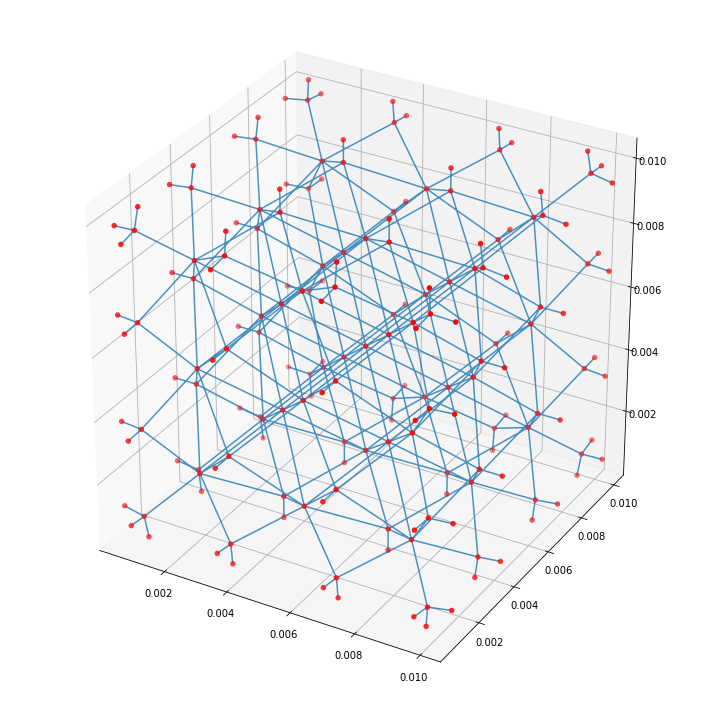

In [10]:
fig = op.topotools.plot_connections(network=pn, alpha=0.8)
fig = op.topotools.plot_coordinates(network=pn, fig=fig, color='r')
fig.set_size_inches(10, 10)
fig.tight_layout()
plt.savefig('3.jpg')

In [11]:
from utils import Imported

In [12]:
geom = Imported(pn)

In [13]:
geom.keys()

dict_keys(['pore.all', 'throat.all', 'pore.label', 'throat.direct_length', 'pore.equivalent_diameter', 'throat.endpoints.head', 'pore.inscribed_diameter', 'throat.conduit_lengths.pore1', 'throat.conduit_lengths.throat', 'throat.conduit_lengths.pore2', 'pore.extended_diameter', 'throat.equivalent_diameter', 'throat.perimeter', 'throat.volume', 'pore.surface_area', 'throat.inscribed_diameter', 'throat.total_length', 'throat.diameter', 'throat.endpoints.tail', 'throat.centroid', 'pore.area', 'pore.centroid', 'pore.volume', 'throat.area', 'throat.length', 'pore.diameter'])

In [14]:
b = set(['pore.all', 'throat.all', 'pore.seed', 'pore.max_size', 'pore.diameter', 'pore.area', 'pore.volume', 'throat.max_size', 'throat.diameter', 'throat.endpoints.head', 'throat.endpoints.tail', 'throat.length', 'throat.surface_area', 'throat.volume', 'throat.area', 'throat.conduit_lengths.pore1', 'throat.conduit_lengths.throat', 'throat.conduit_lengths.pore2'])

In [15]:
b - set(geom.keys())

{'pore.max_size', 'pore.seed', 'throat.max_size', 'throat.surface_area'}

In [16]:
hg = op.phases.Mercury(network=pn, name='mercury')

In [17]:
hg.keys()

dict_keys(['pore.all', 'throat.all', 'pore.temperature', 'pore.pressure', 'pore.molecular_weight', 'pore.critical_pressure', 'pore.critical_temperature', 'pore.critical_volume', 'pore.contact_angle', 'pore.electrical_conductivity', 'pore.diffusivity', 'pore.vapor_pressure', 'pore.density', 'pore.molar_density', 'pore.surface_tension', 'pore.thermal_conductivity', 'pore.viscosity'])

In [18]:
c = set(['pore.all', 'throat.all', 'pore.temperature', 'pore.pressure', 'pore.molecular_weight', 'pore.critical_pressure', 'pore.critical_temperature', 'pore.critical_volume', 'pore.contact_angle', 'pore.electrical_conductivity', 'pore.diffusivity', 'pore.vapor_pressure', 'pore.density', 'pore.molar_density', 'pore.surface_tension', 'pore.thermal_conductivity', 'pore.viscosity'])

In [19]:
c - set(hg.keys())

set()

In [20]:
hg['pore.surface_tension']

array([0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
       0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
       0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
       0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
       0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
       0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
       0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
       0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
       0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
       0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
       0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
       0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
       0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
       0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791, 0.4791,
      

In [21]:
phys = op.physics.GenericPhysics(network=pn, phase=hg, geometry=geom)

In [22]:
phys.keys()

dict_keys(['pore.all', 'throat.all'])

In [23]:
phys.add_model(propname='throat.entry_pressure',
               model=op.models.physics.capillary_pressure.washburn)

In [24]:
phys.keys()

dict_keys(['pore.all', 'throat.all', 'throat.entry_pressure'])

In [25]:
phys['throat.entry_pressure'].mean()

2778.0584192669567

In [26]:
pn['throat.length'].mean()

0.00037427260557500175

In [27]:
hg.keys()

dict_keys(['pore.all', 'throat.all', 'pore.temperature', 'pore.pressure', 'pore.molecular_weight', 'pore.critical_pressure', 'pore.critical_temperature', 'pore.critical_volume', 'pore.contact_angle', 'pore.electrical_conductivity', 'pore.diffusivity', 'pore.vapor_pressure', 'pore.density', 'pore.molar_density', 'pore.surface_tension', 'pore.thermal_conductivity', 'pore.viscosity', 'pore.phys_01', 'throat.phys_01'])

In [28]:
mip = op.algorithms.Porosimetry(network=pn, phase=hg)
mip.set_inlets(pores=pn.pores('left'), overwrite=True)
mip.run(points=100)

―――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
    SOURCE: openpnm.algorithms.OrdinaryPercolation.set_inlets 
    TIME STAMP: 2019-06-19 21:58:40,197    


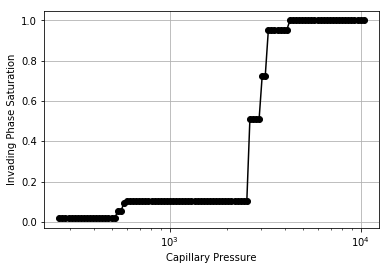

In [29]:
fig = mip.plot_intrusion_curve()